In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastbook

# ignore warnings. warnings will disappear if you run this cell a second time

# CNN for Diabetic Retinopathy Classification

Diabetic Retinopathy (DR) is a complication of diabetes that damages blood vessel networks in the retina. Diagnosis by color fundus images involves skilled clinicians to recognize the presence of lesions in the image that can be used to detect the disease properly, making it a time-consuming process.

Here I create a convolutional neural network (CNN) to classify retinal fundus images as No DR, Mild Non-Proliferative DR, Moderate Non-Proliferative DR, Severe Non-Proliferative DR, and Proliferative DR.

I use the [Messiador](https://www.adcis.net/en/third-party/messidor/) dataset, which consists of 1,200 labeld retinal fundus images. Here I am fine-tuning *resnet-50* for the classification

In [ ]:
pip install fastbook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastbook import *
from PIL import Image as PImage

path = "/content/drive/MyDrive/PBL V GRP 1_3/code/Messidor-2+EyePac_Balanced/"
list_folders =os.listdir(path)

This is what the images look like

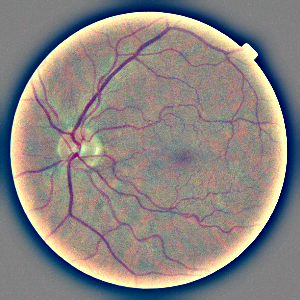

In [ ]:
imgpath = path+'0/'
imageList = os.listdir(imgpath)
PImage.open(imgpath + imageList[0])

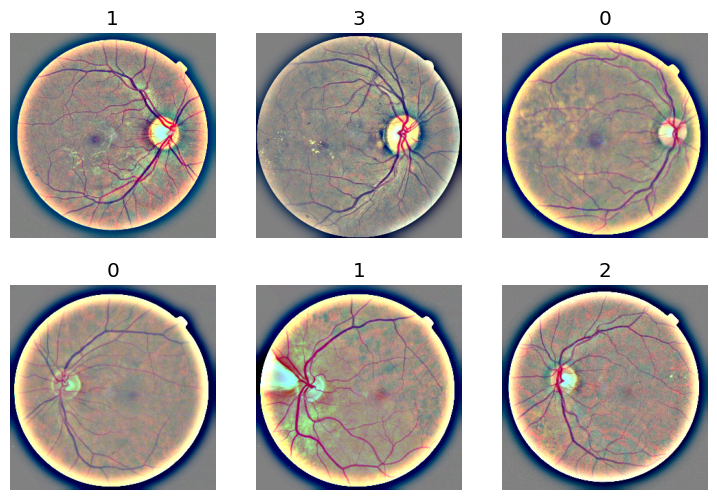

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(300, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.827947,1.311398,0.447222,26:34


epoch,train_loss,valid_loss,error_rate,time
0,1.183036,1.239498,0.377778,38:30
1,0.878337,0.903332,0.291667,38:30
2,0.472800,0.838735,0.269444,38:27


In [ ]:
learn.export('model.pkl')

## Evaluation

Plotting the confusion matrix, we can see the classifier struggles the most with classifications 0-2, and performs significantly better with classes 3 and 4.

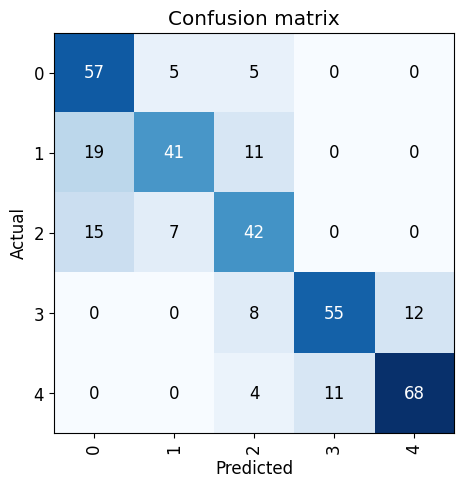

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

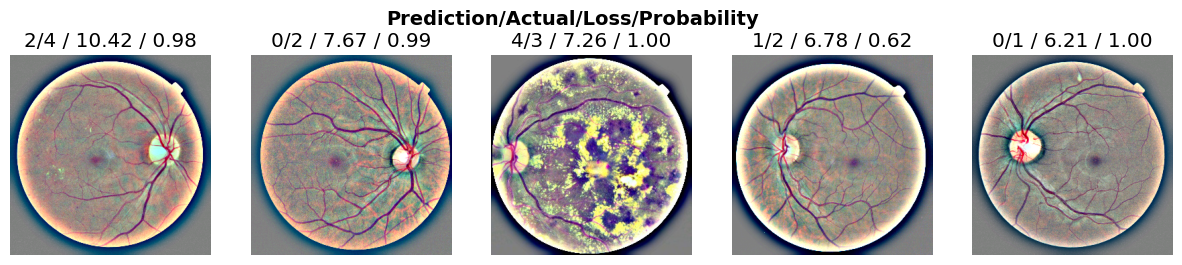

In [ ]:
interp.plot_top_losses(5,nrows=1)